In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [46]:
filename = 'earthquake.csv'
df = pd.read_csv(filename)
df.head(1)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-09-16T02:39:37.930Z,36.708332,-121.371498,2.4,1.55,md,13.0,63.0,0.0201,0.1,...,2025-09-16T02:41:16.301Z,"10 km SW of Tres Pinos, CA",earthquake,0.57,0.56,0.22,9.0,automatic,nc,nc


In [50]:
df['locationSource'].value_counts().index

Index(['nc', 'ci', 'ak', 'tx', 'av', 'us', 'uu', 'uw', 'nn', 'ok', 'mb', 'pr',
       'hv', 'se', 'nm'],
      dtype='object', name='locationSource')

In [3]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [4]:
df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   2
magType               2
nst                1184
gap                1184
dmin               1184
rms                   2
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    1967
depthError            0
magError           1220
magNst             1199
status                0
locationSource        0
magSource             0
dtype: int64

In [5]:
df.dropna(subset=['mag'], inplace=True)

In [6]:
fig = px.scatter_geo(df,
                     lat='latitude',
                     lon='longitude',
                     color='mag',
                     hover_name='place',
                     projection='natural earth',
                     title='Global Earthquakes',
                     color_continuous_scale='purd')
fig.update_layout(legend=dict(title='Magnitude'))
fig.show()

In [7]:
df['magType'].value_counts()

magType
ml       6964
md       2159
mb        692
mww        87
mw         20
mwr        12
mb_lg       9
mh          6
mlv         1
Name: count, dtype: int64

In [8]:
magtype = df.groupby('magType')['mag'].mean().reset_index()
magtype

,magType,mag
0,mb,4.563006
1,mb_lg,2.411111
2,md,1.189717
3,mh,-0.185000
4,ml,1.065844
5,mlv,0.900000
6,mw,3.648500
7,mwr,4.300000
8,mww,5.337931


In [9]:
fig = px.pie(magtype,
             values=df['magType'].value_counts().values,
             names='magType',
             title='Average Magnitude by Type',
             color_discrete_sequence=px.colors.sequential.Pinkyl_r)
fig.show()

In [10]:
fig = px.bar(x=magtype['magType'], y=magtype['mag'], title='Average Magnitude by Type')
fig.update_layout(xaxis_title='Magnitude Type', yaxis_title='Average Magnitude')
fig.show()

In [11]:
df['magError'].fillna(df['magError'].mean(), inplace=True)
df['magNst'].fillna(df['magNst'].mean(), inplace=True)
df['horizontalError'].fillna(df['horizontalError'].mean(), inplace=True)
df['nst'].fillna(df['nst'].mean(), inplace=True)
df['gap'].fillna(df['gap'].mean(), inplace=True)
df['dmin'].fillna(df['dmin'].mean(), inplace=True)

C:\Users\KUSHANKUR\AppData\Local\Temp\ipykernel_2780\233849579.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\KUSHANKUR\AppData\Local\Temp\ipykernel_2780\233849579.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [12]:
df.isnull().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
dtype: int64

In [13]:
fig = px.scatter(df, x='mag', y='depth', title='Magnitude vs Depth')
fig.show()

In [14]:
fig = px.scatter(df, x='depthError' , y = 'magError', title='Depth Error vs Magnitude Error')
fig.show()

In [15]:
df['type'].value_counts()

type
earthquake      9753
quarry blast     130
explosion         65
landslide          1
other event        1
Name: count, dtype: int64

Text(0.5, 1.0, 'Gap Distribution')

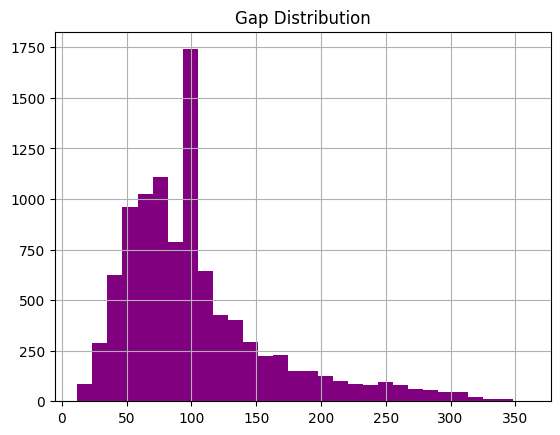

In [16]:
df['gap'].hist(bins=30, color='purple')
plt.title('Gap Distribution')

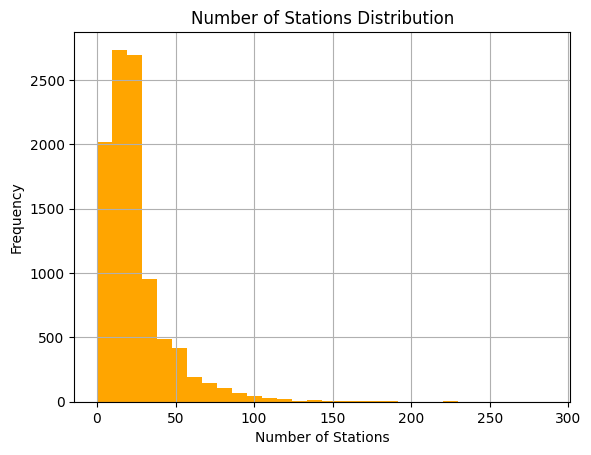

In [17]:
df['nst'].hist(bins=30, color='orange')
plt.title('Number of Stations Distribution')
plt.xlabel('Number of Stations')
plt.ylabel('Frequency')
plt.show()

In [18]:
fig = px.scatter(df, x='mag', y='gap', color='magType', title='Magnitude vs Gap')
fig.show()

In [19]:
df['magSource'].value_counts()

magSource
ci    1588
nc    1587
ak    1182
tx    1129
av    1019
us     903
uu     498
uw     446
nn     407
ok     380
mb     372
pr     197
hv     186
se      31
nm      25
Name: count, dtype: int64

In [20]:
fig = px.pie(values=df['magSource'].value_counts().values,
             names=df['magSource'].value_counts().index,
             title='Magnitude Source Distribution',
             color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.show()

In [21]:
mag_source = df.groupby('magSource')['mag'].mean().reset_index()
mag_source

,magSource,mag
0,ak,1.599492
1,av,-0.045574
2,ci,0.970145
3,hv,1.708387
4,mb,0.925753
5,nc,1.054297
6,nm,1.864800
7,nn,1.226536
8,ok,1.298000
9,pr,2.844061


In [22]:
fig = px.bar(mag_source, x='magSource', y='mag', title='Average Magnitude by Source')
fig.update_layout(xaxis_title='Magnitude Source', yaxis_title='Average Magnitude')
fig.show()

In [23]:
df['status'].value_counts()

status
reviewed     7579
automatic    2371
Name: count, dtype: int64

In [24]:
fig = px.scatter(df, x='magError', y='mag', color='status', title='Magnitude Error vs Magnitude by Status')
fig.show()

In [25]:
fig = px.scatter(df, x='depthError', y='mag', color='status', title='Depth Error vs Magnitude by Status')
fig.show()

In [26]:
fig = px.scatter(df, x='horizontalError', y='mag', color='status', title='Horizontal Error vs Magnitude by Status')
fig.show()

In [27]:
fig = px.scatter(df, x='dmin', y='mag', color='status', title='Minimum Distance vs Magnitude by Status')
fig.show()

In [28]:
fig = px.scatter(df, x='rms', y='mag', color='status', title='RMS vs Magnitude by Status')
fig.show()

In [29]:
# numeric cols
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('mag')
numeric_cols.remove('magError')
numeric_cols.remove('magNst')
numeric_cols
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()[1:-1]
categorical_cols.remove('magType')
categorical_cols.remove('id')
categorical_cols.remove('place')
categorical_cols.remove('updated')
categorical_cols.remove('type')
categorical_cols

['net', 'status', 'locationSource']

In [30]:
numeric_cols,categorical_cols

(['latitude',
  'longitude',
  'depth',
  'nst',
  'gap',
  'dmin',
  'rms',
  'horizontalError',
  'depthError'],
 ['net', 'status', 'locationSource'])

In [31]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000
mean,39.869031,-108.264084,16.907468,1.382834,24.564667,103.958810,0.322504,0.248661,1.451680,2.141937,0.182142,20.397921
std,15.889011,64.703466,42.197933,1.251018,20.566491,57.545347,1.148348,0.264020,2.488380,5.535129,0.096123,34.018476
min,-62.122000,-179.878000,-3.370000,-1.420000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.535375,-126.661300,3.100000,0.680000,11.000000,65.000000,0.019420,0.100000,0.290000,0.460000,0.118000,7.000000
50%,38.506167,-117.696250,6.925100,1.135000,20.000000,96.000000,0.065120,0.150150,0.587523,0.749568,0.182142,14.000000
75%,49.413333,-104.471050,11.627500,1.710000,29.000000,122.000000,0.235713,0.270000,1.451680,1.560000,0.210000,20.397921
max,79.580800,179.957200,639.511000,7.500000,287.000000,360.000000,35.137000,2.150000,32.560000,278.200000,0.950000,676.000000


In [32]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9.950000e+03,9.950000e+03,9.950000e+03,9950.000000,9.950000e+03,9.950000e+03,9.950000e+03,9.950000e+03,9.950000e+03,9.950000e+03,9950.000000,9950.000000
mean,-1.056888e-16,-2.285163e-17,3.142099e-17,1.382834,7.426778e-17,-1.771001e-16,-8.569360e-18,1.114017e-16,-7.212544e-17,-4.498914e-17,0.182142,20.397921
std,1.000050e+00,1.000050e+00,1.000050e+00,1.251018,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.096123,34.018476
min,-6.419289e+00,-1.106857e+00,-4.805564e-01,-1.420000,-1.194462e+00,-1.598104e+00,-2.808561e-01,-9.418762e-01,-5.834130e-01,-3.869909e-01,0.000000,0.000000
25%,-3.986387e-01,-2.843455e-01,-3.272237e-01,0.680000,-6.595850e-01,-6.770446e-01,-2.639440e-01,-5.630976e-01,-4.668655e-01,-3.038812e-01,0.118000,7.000000
50%,-8.577834e-02,-1.457826e-01,-2.365725e-01,1.135000,-2.219580e-01,-1.383120e-01,-2.241457e-01,-3.731402e-01,-3.472945e-01,-2.515640e-01,0.182142,14.000000
75%,6.007159e-01,5.862475e-02,-1.251301e-01,1.710000,2.156691e-01,3.135283e-01,-7.558272e-02,8.082593e-02,-1.784741e-16,-1.051405e-01,0.210000,20.397921
max,2.499449e+00,4.454719e+00,1.475510e+01,7.500000,1.276098e+01,4.449605e+00,3.031854e+01,7.201863e+00,1.250206e+01,4.987633e+01,0.950000,676.000000


In [33]:
encoder = OneHotEncoder(sparse_output=False, drop=None)

encoded = encoder.fit_transform(df[categorical_cols])

# Create DataFrame with proper column names
encoded_df = pd.DataFrame(
    encoded, 
    columns=encoder.get_feature_names_out(categorical_cols),
    index=df.index
)

# Concatenate the original DataFrame including the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource', 'net_ak', 'net_av', 'net_ci', 'net_hv',
       'net_mb', 'net_nc', 'net_nm', 'net_nn', 'net_ok', 'net_pr', 'net_se',
       'net_tx', 'net_us', 'net_uu', 'net_uw', 'status_automatic',
       'status_reviewed', 'locationSource_ak', 'locationSource_av',
       'locationSource_ci', 'locationSource_hv', 'locationSource_mb',
       'locationSource_nc', 'locationSource_nm', 'locationSource_nn',
       'locationSource_ok', 'locationSource_pr', 'locationSource_se',
       'locationSource_tx', 'locationSource_us', 'locationSource_uu',
       'locationSource_uw'],
      dtype='object')

In [34]:
from sklearn.model_selection import train_test_split

train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

print(f'Train shape: {train_df.shape}')
print(f'Validation shape: {val_df.shape}')
print(f'Test shape: {test_df.shape}')

Train shape: (5970, 54)
Validation shape: (1990, 54)
Test shape: (1990, 54)


In [35]:
train_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,locationSource_nc,locationSource_nm,locationSource_nn,locationSource_ok,locationSource_pr,locationSource_se,locationSource_tx,locationSource_us,locationSource_uu,locationSource_uw
3796,2025-09-03T22:03:01.460Z,-1.282336,-0.729983,-0.310160,1.36,ml,0.021168,-6.422877e-01,-2.376266e-01,-0.487342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9712,2025-08-17T17:24:55.500Z,0.879654,-0.905521,-0.267976,-0.15,ml,-0.854086,1.397436e-01,-2.336729e-01,-0.449464,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2289,2025-09-08T08:17:23.540Z,0.295804,-0.061057,-0.185503,2.56,ml,1.188174,-5.380168e-01,-1.669476e-01,-0.222197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8026,2025-08-22T11:25:49.863Z,-0.519947,0.060820,-0.235475,1.40,ml,-0.027457,-5.380168e-01,-1.937701e-01,-0.563098,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7736,2025-08-23T07:15:00.383Z,1.332974,-0.668230,1.274831,1.00,ml,0.000000,-2.469630e-16,-4.834243e-17,0.800505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,2025-08-31T14:15:36.660Z,-0.065113,-0.224681,-0.342154,1.83,md,0.458795,-1.128885e+00,-2.728494e-01,-0.828243,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
905,2025-09-12T21:35:42.090Z,-0.175530,-0.204447,-0.330542,1.35,md,-0.805461,1.321480e+00,-2.329588e-01,-0.411586,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2663,2025-09-07T06:51:08.280Z,-0.856631,3.853686,2.373992,4.50,mb,0.507420,3.135283e-01,8.503907e-01,1.785329,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
853,2025-09-13T01:33:29.580Z,-1.380952,0.637470,-0.072222,2.73,md,-0.416459,1.877591e+00,-2.397254e-01,-0.260075,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [36]:
input_cols = list(train_df.columns)[1:]
input_cols.remove('mag')
input_cols.remove('magError')
input_cols.remove('magNst')
input_cols.remove('magType')
input_cols.remove('id')
input_cols.remove('place')
input_cols.remove('updated')
input_cols.remove('type')
input_cols.remove('status')
input_cols.remove('magSource')
input_cols.remove('locationSource')
input_cols

['latitude',
 'longitude',
 'depth',
 'nst',
 'gap',
 'dmin',
 'rms',
 'net',
 'horizontalError',
 'depthError',
 'net_ak',
 'net_av',
 'net_ci',
 'net_hv',
 'net_mb',
 'net_nc',
 'net_nm',
 'net_nn',
 'net_ok',
 'net_pr',
 'net_se',
 'net_tx',
 'net_us',
 'net_uu',
 'net_uw',
 'status_automatic',
 'status_reviewed',
 'locationSource_ak',
 'locationSource_av',
 'locationSource_ci',
 'locationSource_hv',
 'locationSource_mb',
 'locationSource_nc',
 'locationSource_nm',
 'locationSource_nn',
 'locationSource_ok',
 'locationSource_pr',
 'locationSource_se',
 'locationSource_tx',
 'locationSource_us',
 'locationSource_uu',
 'locationSource_uw']

In [37]:
target_col = df['mag']
target_col

0       1.55
1       1.74
2       1.59
3       0.53
4       0.77
        ... 
9947    4.40
9948    1.05
9949    0.84
9950    1.26
9951    0.04
Name: mag, Length: 9950, dtype: float64

In [38]:
input_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()

# Drop target columns (you don't want to predict using them)
for col in ['mag', 'magError', 'magNst']:
    if col in input_cols:
        input_cols.remove(col)

print("Final input features:", input_cols)

Final input features: ['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms', 'horizontalError', 'depthError', 'net_ak', 'net_av', 'net_ci', 'net_hv', 'net_mb', 'net_nc', 'net_nm', 'net_nn', 'net_ok', 'net_pr', 'net_se', 'net_tx', 'net_us', 'net_uu', 'net_uw', 'status_automatic', 'status_reviewed', 'locationSource_ak', 'locationSource_av', 'locationSource_ci', 'locationSource_hv', 'locationSource_mb', 'locationSource_nc', 'locationSource_nm', 'locationSource_nn', 'locationSource_ok', 'locationSource_pr', 'locationSource_se', 'locationSource_tx', 'locationSource_us', 'locationSource_uu', 'locationSource_uw']


In [39]:
target_col = train_df['mag']

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_df[input_cols], target_col)
lr.coef_

array([-0.13026745,  0.11243879, -0.007044  ,  0.35467351,  0.07948449,
        0.03137374,  0.19622325,  0.11965063,  0.06112581,  0.01198542,
       -0.51728203, -0.28581601,  0.03598742, -0.09799387, -0.11364221,
        0.26346171, -0.0797535 , -0.3679204 ,  0.53561612,  0.36383386,
       -0.02948821,  0.57150401, -0.0406513 , -0.24984099,  0.03653024,
       -0.03653024,  0.01198542, -0.51728203, -0.28581601,  0.03598742,
       -0.09799387, -0.11364221,  0.26346171, -0.0797535 , -0.3679204 ,
        0.53561612,  0.36383386, -0.02948821,  0.57150401, -0.0406513 ,
       -0.24984099])

In [41]:
lr.predict(val_df[input_cols])


array([1.02389716, 1.15961112, 1.28712654, ..., 1.00709019, 1.58225786,
       1.30700429], shape=(1990,))

In [42]:
predictions = lr.predict(test_df[input_cols])
predictions

array([ 0.78911643,  1.22190469,  0.9355297 , ...,  1.01810828,
        1.31802413, -0.25368578], shape=(1990,))

In [44]:
new_eq = {
    "latitude": 38.322,
    "longitude": -118.433,
    "depth": 7.6,
    "nst": 45,
    "gap": 32.0,
    "dmin": 0.045,
    "rms": 0.76,
    "horizontalError": 1.2,
    "depthError": 0.8,
    "magError": 0.1,
    "magNst": 40,
    "net": "ci",
    "status": "reviewed",
    "locationSource": "ci"
}

# Step 1: make DataFrame
def make_prediction(new_eq):
    new_eq_df = pd.DataFrame([new_eq])
    
    # Step 2: scale numeric features
    new_eq_df[numeric_cols] = scaler.transform(new_eq_df[numeric_cols])
    
    # Step 3: encode categoricals
    encoded_new = encoder.transform(new_eq_df[categorical_cols])
    encoded_new_df = pd.DataFrame(
        encoded_new,
        columns=encoder.get_feature_names_out(categorical_cols),
        index=new_eq_df.index
    )
    
    # Step 4: combine ONLY numeric + encoded categoricals
    new_eq_final = pd.concat([new_eq_df[numeric_cols], encoded_new_df], axis=1)
    
    # 🚨 IMPORTANT: drop the raw categoricals so 'net', 'status', 'locationSource' never leak through
    # (this is why you got the error before)
    # new_eq_final should contain only numeric and encoded features now
    
    # Step 5: reorder columns to match training
    new_eq_final = new_eq_final.reindex(columns=input_cols, fill_value=0)
    new_eq_final.drop(['net'], axis=1, inplace=True)
    # Step 6: predict
    predicted_mag = lr.predict(new_eq_final)
    print(f"Predicted Magnitude: {predicted_mag[0]:.2f}")

make_prediction(new_eq)

KeyError: "['net'] not found in axis"